<div style="max-width:66ch;">

# Exercise - Logistic regression 

These are introductory exercises in Machine learning with focus in **logistic regression** used for classifcation.

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

</div>

<div style="max-width:66ch;">

---

## 0. Iris flower dataset (*)

In the whole exercise, we will work with the famous Iris flower dataset, which was collected in 1936 by Ronald Fisher, a statistician and biologist. Use the ```datasets``` module from scikit-learn to load the iris dataset. 

&nbsp; a) Check keys on the loaded data and check what the different values for each key are.

&nbsp; b) Now insert the data into a DataFrame. 

&nbsp; c) Do some EDA to get an understanding of the dataset. 

&nbsp; d) Make a correlation heatmap to see how each feature is correlated to each other. What do the numbers mean?

&nbsp; e) Make a boxplot. The points outside of the boxplot are statistically calculated outliers using Tukey's rule for boxplot. 

&nbsp; f) Now remove the outliers in data. (**)

- Lower bound outlier: $Q_1 - 1.5\cdot IQR$
- Upper bound outlier: $Q_3 + 1.5\cdot IQR$

where $Q_1$ is the 1st quartile or 25 percentile, $Q_3$ is the 3rd quartile or 75 percentile and $IQR = Q_3-Q_1$ is the interquartile range. 

</div>


In [10]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
#a.)

keys = iris.keys()

print(keys)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [17]:
#b.)

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
# c.)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [19]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


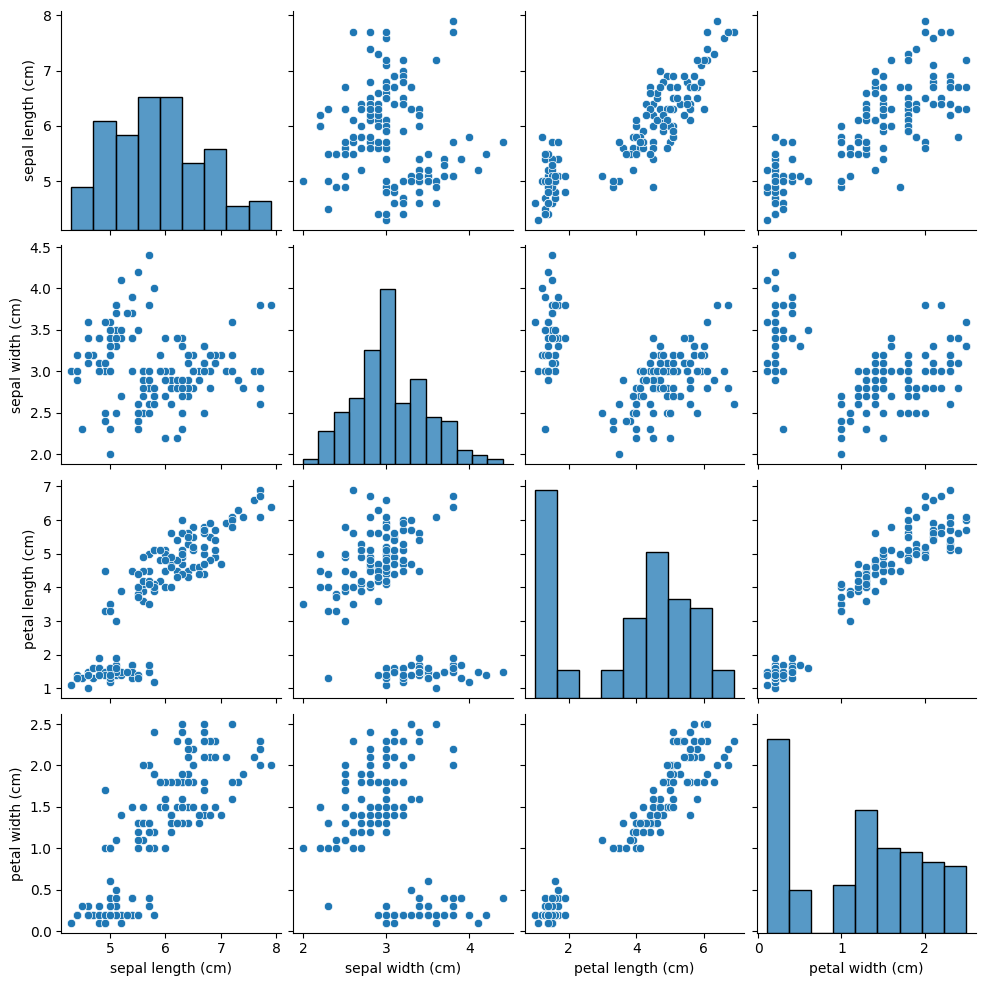

In [20]:
sns.pairplot(df)

Korrelationsvärdet mellan två funktioner kan variera mellan -1 och 1:

Ett värde av 1 innebär att det finns en perfekt positiv korrelation: när en funktion ökar, ökar den andra funktionen också i exakt samma takt.
Ett värde av 0 innebär att det inte finns något linjärt samband mellan de två funktionerna.
Ett värde av -1 innebär att det finns en perfekt negativ korrelation: när en funktion ökar, minskar den andra funktionen i exakt samma takt.
I heatmapen du visat, används färger för att indikera styrkan och riktningen på korrelationen. Vanligtvis visar varmare färger (som rött) stark positiv korrelation och kallare färger (som blått) stark negativ korrelation. Ljusare färger eller neutrala färger (som vitt eller ljusare nyanser av rosa och blått) representerar svagare korrelationer.

<Axes: >

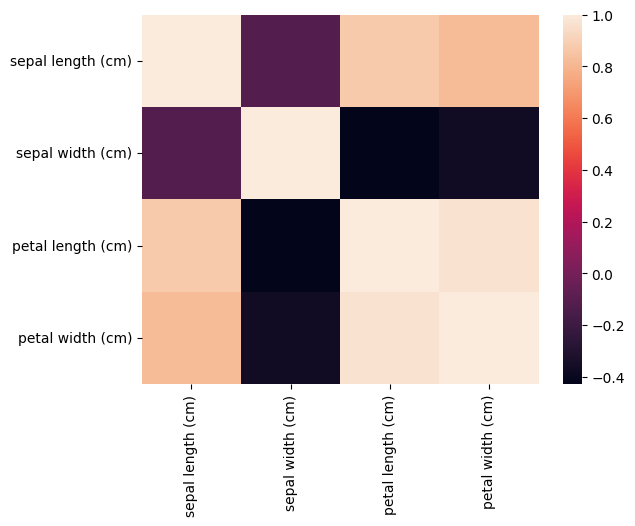

In [21]:
# d.)

sns.heatmap(df.corr())

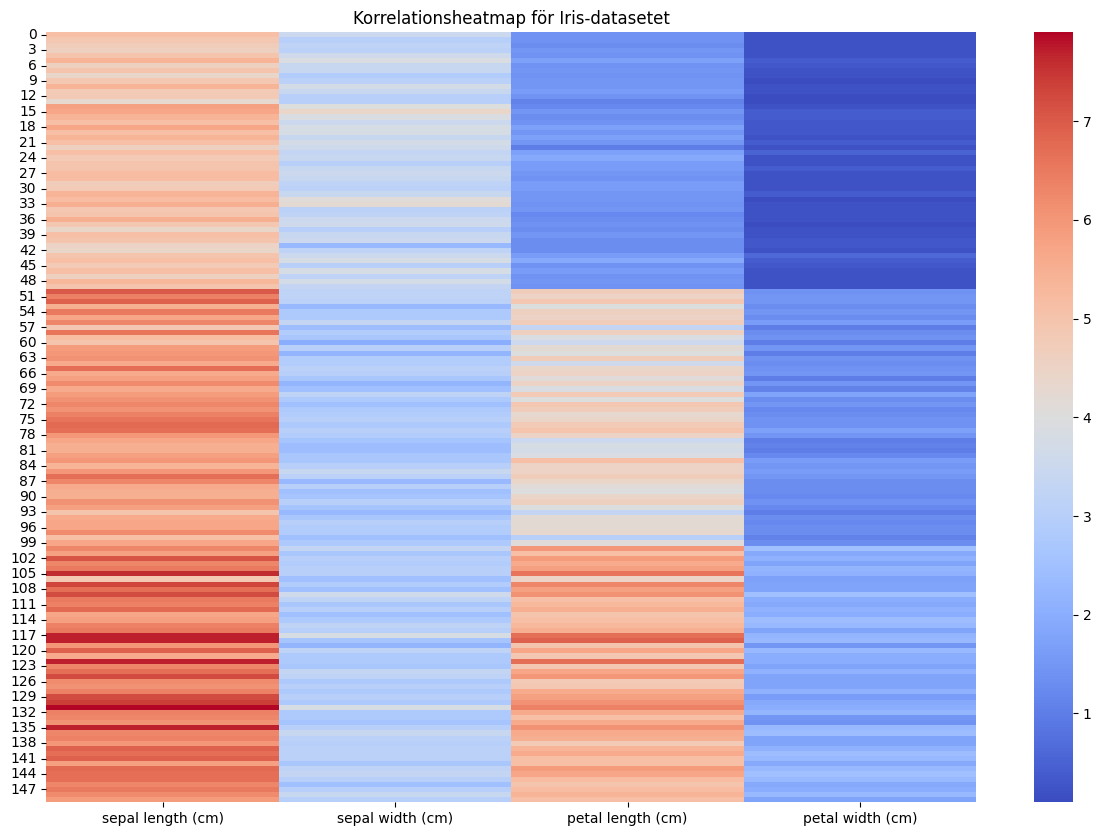

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df, annot=False, cmap='coolwarm')
plt.title('Korrelationsheatmap för Iris-datasetet')
plt.show()

In [25]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


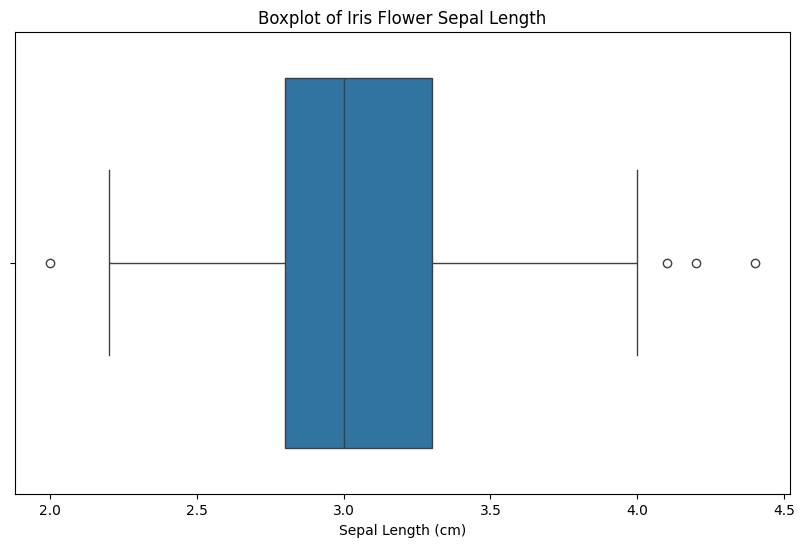

In [33]:
# e.)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sepal width (cm)' )
plt.title('Boxplot of Iris Flower Sepal Length')
plt.xlabel('Sepal Length (cm)')


plt.show()

In [30]:
# f.)
df.isnull().values.any()


False

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [32]:
df.shape

(150, 4)

In [37]:
# Calculate Q1, Q3, and IQR for 'sepal length (cm)'
Q1 = df['sepal width (cm)'].quantile(0.25)
Q3 = df['sepal width (cm)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
df_filtered = df[(df['sepal width (cm)'] >= lower_bound) & (df['sepal width (cm)'] <= upper_bound)]

# Display the number of records before and after outlier removal
original_count = len(df)
filtered_count = len(df_filtered)
original_count, filtered_count


(150, 146)

After applying the outlier removal process to the 'sepal width (cm)' feature of the Iris dataset, we found that 146 records remain out of the original 150. This means that, based on the criteria (Q1 - 1.5 * IQR and Q3 + 1.5 * IQR) for identifying outliers in the 'sepal width (cm)' feature, 4 records were considered outliers and thus removed from the dataset.

<div style="max-width:66ch;">

---
## 1. Split and scale data (*)

Do train|test split and scale the data using feature standardization, I used default test size 0.33 and random state 42. Check the mean and standard deviation on training and test data. 


</div>


In [44]:
df_filtered.shape

(146, 4)

In [39]:
df_filtered.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
X = df_filtered  # Features
y = iris.target[df_filtered.index]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((97, 4), (49, 4), (97,), (49,))

In [47]:
# Calculate mean and standard deviation for both training and test data
train_mean_std = X_train.describe().loc[['mean', 'std']]
test_mean_std = X_test.describe().loc[['mean', 'std']]

train_mean_std, test_mean_std


(      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 mean           5.875258          3.023711           3.875258          1.230928
 std            0.871066          0.414772           1.719740          0.723758,
       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 mean           5.820408          3.073469           3.671429          1.200000
 std            0.762938          0.363877           1.842100          0.832917)

<div style="max-width:66ch;">

---
## 2. Classify with logistic regression (*)

Use k-folded cross-validation with logistic regression to find suitable hyperparameters and model. Check the documentation to see which parameters that can be chosen through cross-validation. Check the models parameters and see what it has chosen. 

</div>



In [48]:
# skalar datan
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_train.mean(), scaled_X_train.std(), scaled_X_test.mean(), scaled_X_test.std()

(4.944498418949151e-16,
 0.9999999999999997,
 -0.026200181679167572,
 0.9999349444958893)

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Förbered en pipeline (om du inte redan har skalat dina data)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='saga', max_iter=10000))
])

# Definiera sökrymden för hyperparametrarna
param_grid = {
    'logreg__penalty': ['elasticnet'],  # Säkerställer att bara elasticnet används
    'logreg__l1_ratio': [0, 0.25, 0.5, 0.75, 1],  # Utforska olika blandningar av L1/L2
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['saga']  # Säkerställer att SAGA-solver används
}


# Skapa och konfigurera GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Använd GridSearchCV på din träningsdata
grid_search.fit(X_train, y_train)

# Visa de bästa hyperparametrarna och den uppnådda noggrannheten
print("Bästa hyperparametrar:", grid_search.best_params_)
print("Bästa modellens noggrannhet:", grid_search.best_score_)


Bästa hyperparametrar: {'logreg__C': 10, 'logreg__l1_ratio': 0, 'logreg__penalty': 'elasticnet', 'logreg__solver': 'saga'}
Bästa modellens noggrannhet: 0.9589473684210527


In [51]:
# Logistic regresseion
from sklearn.linear_model import LogisticRegression

#model = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=)
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0, C=10, max_iter=1000)
model.fit(scaled_X_train, y_train)

# parametrar för logistic regresseion som vi tränat från träningsdatan
model.coef_, model.intercept_

(array([[-1.54174417,  1.63895884, -3.26218243, -3.04205856],
        [ 1.13298962, -0.21174316, -1.33781124, -1.07244349],
        [ 0.40875455, -1.42721568,  4.59999367,  4.11450205]]),
 array([-0.6049195 ,  3.72041886, -3.11549936]))

<div style="max-width:66ch;">


---
## 3. Evaluate model (*)

Make a prediction on the testing data. 

&nbsp; a) Check manually the first 10 values of $y_{test}$ against your prediction. 

&nbsp; b) Plot a confusion matrix. Can you see which predictions the model have mispredicted?

&nbsp; c) Print a classification report and interpret it. 

</div>


In [57]:
# a.)
# Gör förutsägelser på testdatan
y_pred = model.predict(scaled_X_test)

# Jämför de första 10 förutsagda värdena med de faktiska värdena
print("Förutsagda klasser: ", y_pred[:10])
print("Faktiska klasser: ", y_test[:10])


Förutsagda klasser:  [0 2 0 0 0 2 0 1 1 0]
Faktiska klasser:  [0 2 0 0 0 2 0 1 1 0]


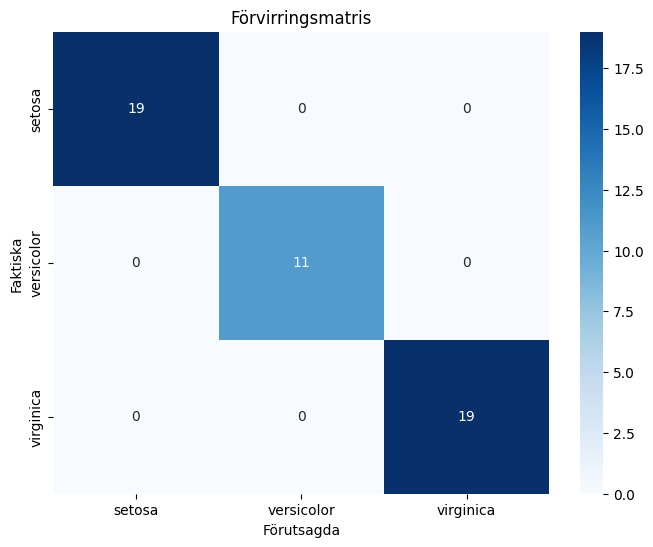

In [59]:
# b.)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Beräkna förvirringsmatrisen
conf_mat = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Förutsagda')
plt.ylabel('Faktiska')
plt.title('Förvirringsmatris')
plt.show()



In [62]:
# c.)


from sklearn.metrics import classification_report

# Skriv ut klassificeringsrapporten
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print(report)



              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        19

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



<div style="max-width:66ch;">

---

## 4. $k$-folded cross-validation for evaluation (**)

To be more robust in reporting the results, you should report the results as $\mu_{score}$, i.e. average score through a k-folded cross-validation. Report the score for precision, recall, f1-score for each label and overall accuracy. Do the cross-validation manually using for statement. 

---

</div>

<div style="width: 66ch;">


</div>

<div style="background-color: #FFF; color: #212121; border-radius: 20px; width:25ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1em; width: 60%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
    <div>
</div>